In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=cb913bf2cb93b6224e6145cc044c7656ce0218abb7c2f1895631d836b66776bd
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

In [ ]:
df1=pd.read_csv('../content/tmdb_5000_movies.csv')
df2=pd.read_csv('../content/ratings.csv')

In [ ]:
metadata = pd.read_csv('tmdb_5000_movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
display(metadata.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
metadata['overview'] = metadata['overview'].fillna('')

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [ ]:
def get_content_based_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return metadata[['title', 'vote_average', 'vote_count']].iloc[movie_indices]


In [ ]:
ratings = pd.read_csv('ratings.csv')


In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
svd = SVD()
svd.fit(trainset)
predictions = svd.test(testset)

In [ ]:
accuracy.rmse(predictions)

def get_collaborative_recommendations(user_id, svd=svd, metadata=metadata):
    user_ratings = ratings[ratings['userId'] == user_id]
    user_rated_movies = user_ratings['movieId'].tolist()
    all_movies = metadata['id'].tolist()
    unrated_movies = [movie for movie in all_movies if movie not in user_rated_movies]

    predictions = [svd.predict(user_id, movie_id) for movie_id in unrated_movies]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    recommended_movie_ids = [pred.iid for pred in recommendations[:10]]
    return metadata[metadata['id'].isin(recommended_movie_ids)][['title', 'vote_average', 'vote_count']]

RMSE: 0.8322


In [ ]:
def get_hybrid_recommendations(user_id, title, metadata=metadata, cosine_sim=cosine_sim, svd=svd):
    content_based_recs = get_content_based_recommendations(title, cosine_sim)
    collaborative_recs = get_collaborative_recommendations(user_id, svd, metadata)
    hybrid_recs = pd.concat([content_based_recs, collaborative_recs]).drop_duplicates().head(10)
    return hybrid_recs

In [ ]:
def plot_recommendations(recommendations, title):
    plt.figure(figsize=(10, 6))
    plt.barh(recommendations['title'], recommendations['vote_average'], color='skyblue')
    plt.xlabel('Vote Average')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


In [ ]:
user_id = 1
title = 'The Dark Knight'
hybrid_recs = get_hybrid_recommendations(user_id, title)

In [ ]:
print("Hybrid Recommendations:")
display(hybrid_recs)

Hybrid Recommendations:


,title,vote_average,vote_count
3,The Dark Knight Rises,7.6,9106
428,Batman Returns,6.6,1673
3854,"Batman: The Dark Knight Returns, Part 2",7.9,419
299,Batman Forever,5.2,1498
1359,Batman,7.0,2096
119,Batman Begins,7.5,7359
1181,JFK,7.5,502
9,Batman v Superman: Dawn of Justice,5.7,7004
2507,Slow Burn,5.5,16
210,Batman & Robin,4.2,1418


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['vote_average'].plot(kind='hist', bins=20, title='vote_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['vote_count'].plot(kind='hist', bins=20, title='vote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='vote_average', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='vote_average', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['vote_average'].plot(kind='line', figsize=(8, 4), title='vote_average')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['vote_count'].plot(kind='line', figsize=(8, 4), title='vote_count')
plt.gca().spines[['top', 'right']].set_visible(False)

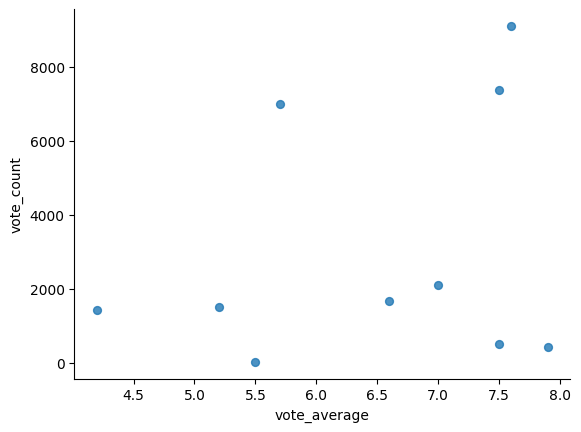

In [ ]:
# @title vote_average vs vote_count

from matplotlib import pyplot as plt
hybrid_recs.plot(kind='scatter', x='vote_average', y='vote_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

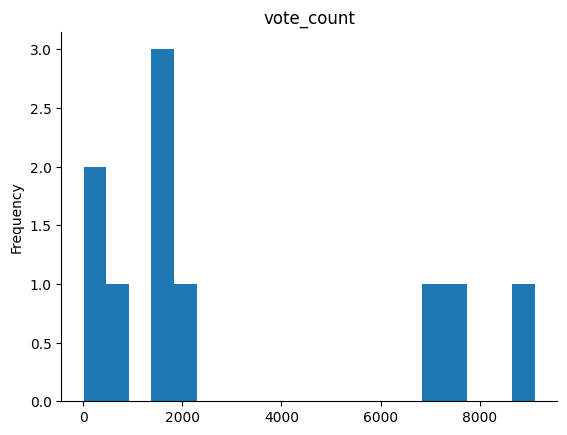

In [ ]:
# @title vote_count

from matplotlib import pyplot as plt
hybrid_recs['vote_count'].plot(kind='hist', bins=20, title='vote_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

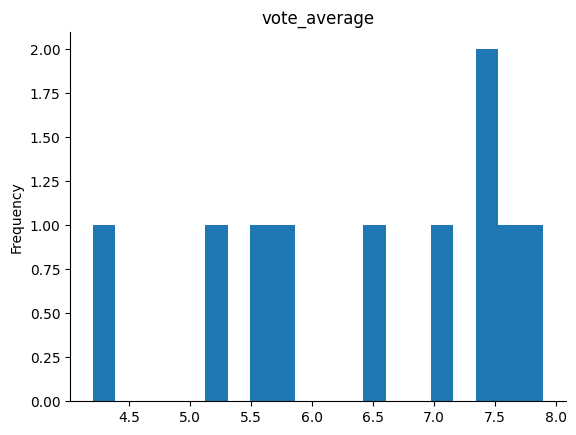

In [ ]:
# @title vote_average

from matplotlib import pyplot as plt
hybrid_recs['vote_average'].plot(kind='hist', bins=20, title='vote_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

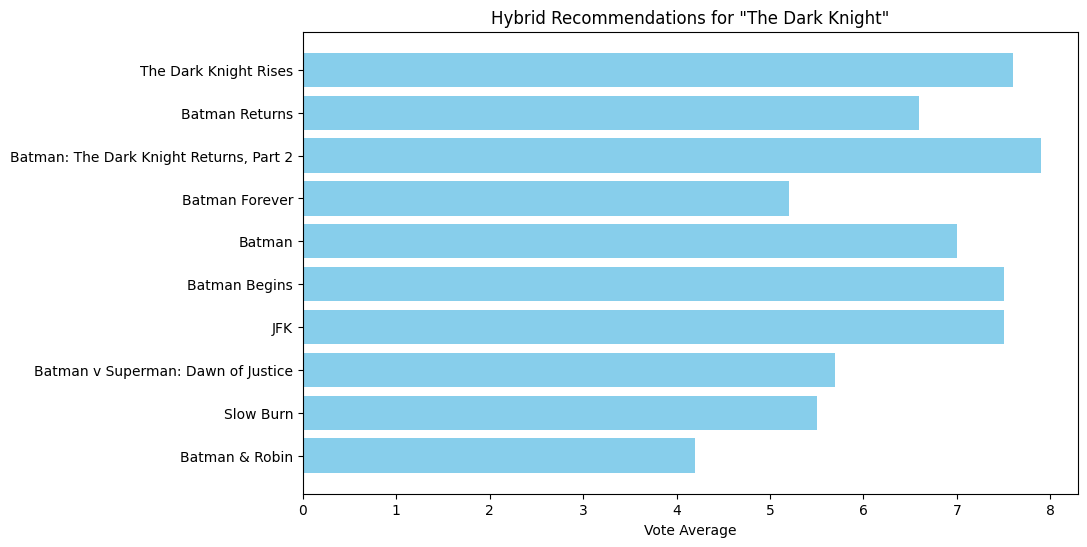

In [ ]:
plot_recommendations(hybrid_recs, 'Hybrid Recommendations for "{}"'.format(title))

In [ ]:
user_id = 1
title = 'The Dark Knight'

Content-Based Recommendations:


,title,vote_average,vote_count
3,The Dark Knight Rises,7.6,9106
428,Batman Returns,6.6,1673
3854,"Batman: The Dark Knight Returns, Part 2",7.9,419
299,Batman Forever,5.2,1498
1359,Batman,7.0,2096
119,Batman Begins,7.5,7359
1181,JFK,7.5,502
9,Batman v Superman: Dawn of Justice,5.7,7004
2507,Slow Burn,5.5,16
210,Batman & Robin,4.2,1418


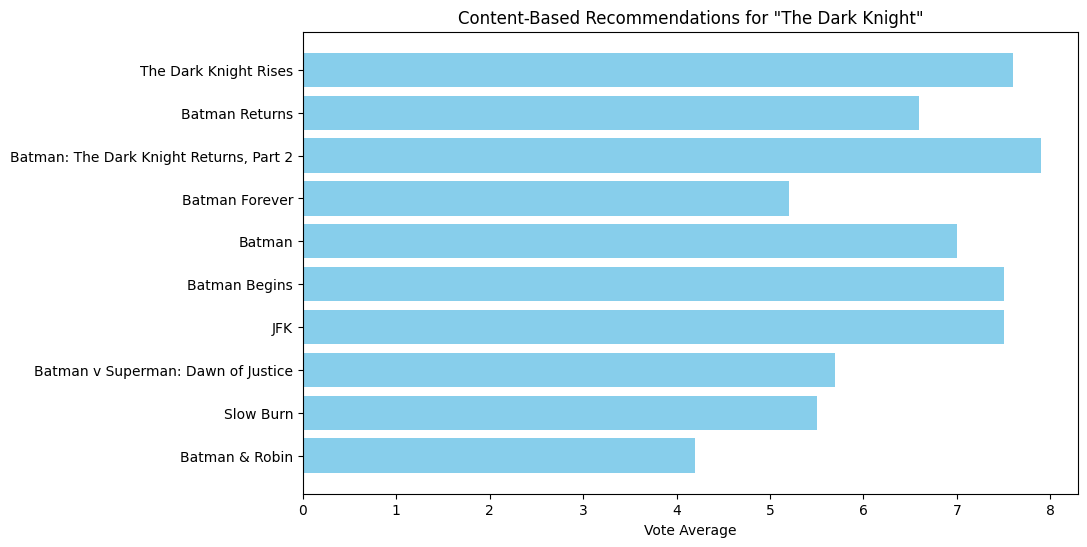

In [ ]:
content_based_recs = get_content_based_recommendations(title)
print("Content-Based Recommendations:")
display(content_based_recs)
plot_recommendations(content_based_recs, 'Content-Based Recommendations for "{}"'.format(title))

Collaborative Recommendations:


,title,vote_average,vote_count
150,Men in Black II,6.0,3114
421,Zodiac,7.3,2023
1025,The Thomas Crown Affair,6.6,339
1666,The Good Thief,6.0,31
1685,Keeping the Faith,5.9,159
1850,Scarface,8.0,2948
2216,We're No Angels,5.6,105
3251,On Her Majesty's Secret Service,6.5,456
3749,They Live,7.1,550
4457,Pandora's Box,7.6,45


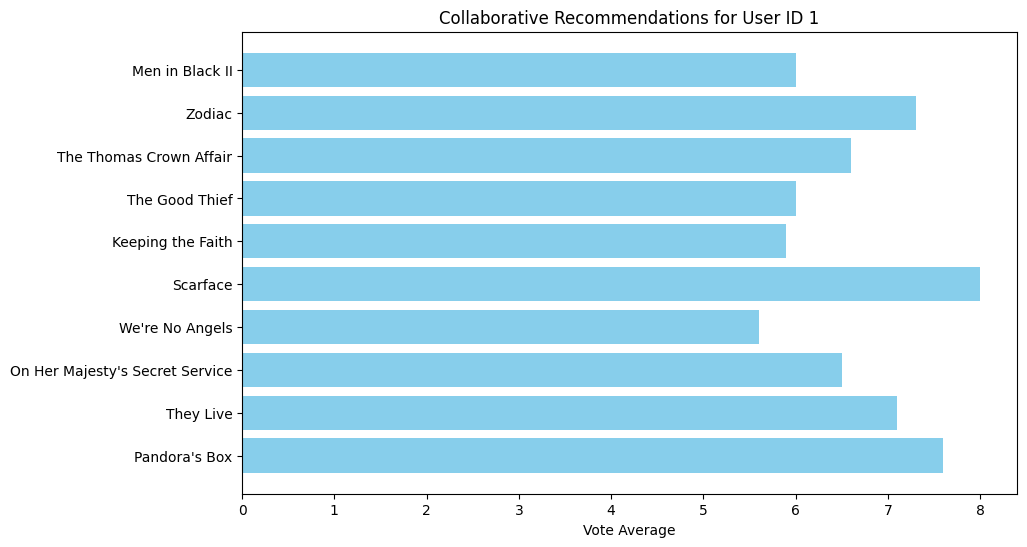

In [ ]:
collaborative_recs = get_collaborative_recommendations(user_id)
print("Collaborative Recommendations:")
display(collaborative_recs)
plot_recommendations(collaborative_recs, 'Collaborative Recommendations for User ID {}'.format(user_id))

Hybrid Recommendations:


,title,vote_average,vote_count
3,The Dark Knight Rises,7.6,9106
428,Batman Returns,6.6,1673
3854,"Batman: The Dark Knight Returns, Part 2",7.9,419
299,Batman Forever,5.2,1498
1359,Batman,7.0,2096
119,Batman Begins,7.5,7359
1181,JFK,7.5,502
9,Batman v Superman: Dawn of Justice,5.7,7004
2507,Slow Burn,5.5,16
210,Batman & Robin,4.2,1418


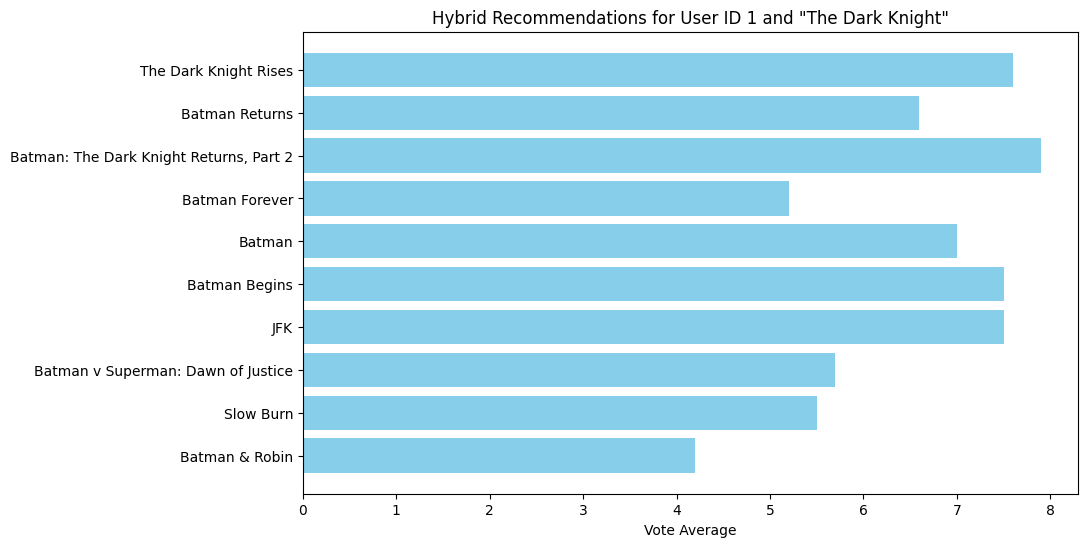

In [ ]:
hybrid_recs = get_hybrid_recommendations(user_id, title)
print("Hybrid Recommendations:")
display(hybrid_recs)
plot_recommendations(hybrid_recs, 'Hybrid Recommendations for User ID {} and "{}"'.format(user_id, title))

In [ ]:
def plot_comparison(content_recs, collaborative_recs, hybrid_recs, title):
    content_recs['Type'] = 'Content-Based'
    collaborative_recs['Type'] = 'Collaborative'
    hybrid_recs['Type'] = 'Hybrid'

    combined_recs = pd.concat([content_recs, collaborative_recs, hybrid_recs])
    combined_recs = combined_recs.drop_duplicates(subset=['title', 'Type'], keep='first')

    plt.figure(figsize=(14, 8))
    for rec_type in combined_recs['Type'].unique():
        subset = combined_recs[combined_recs['Type'] == rec_type]
        plt.scatter(subset['vote_average'], subset['title'], label=rec_type, s=100)
        plt.xlabel('Vote Average')
    plt.title(title)
    plt.legend()
    plt.show()

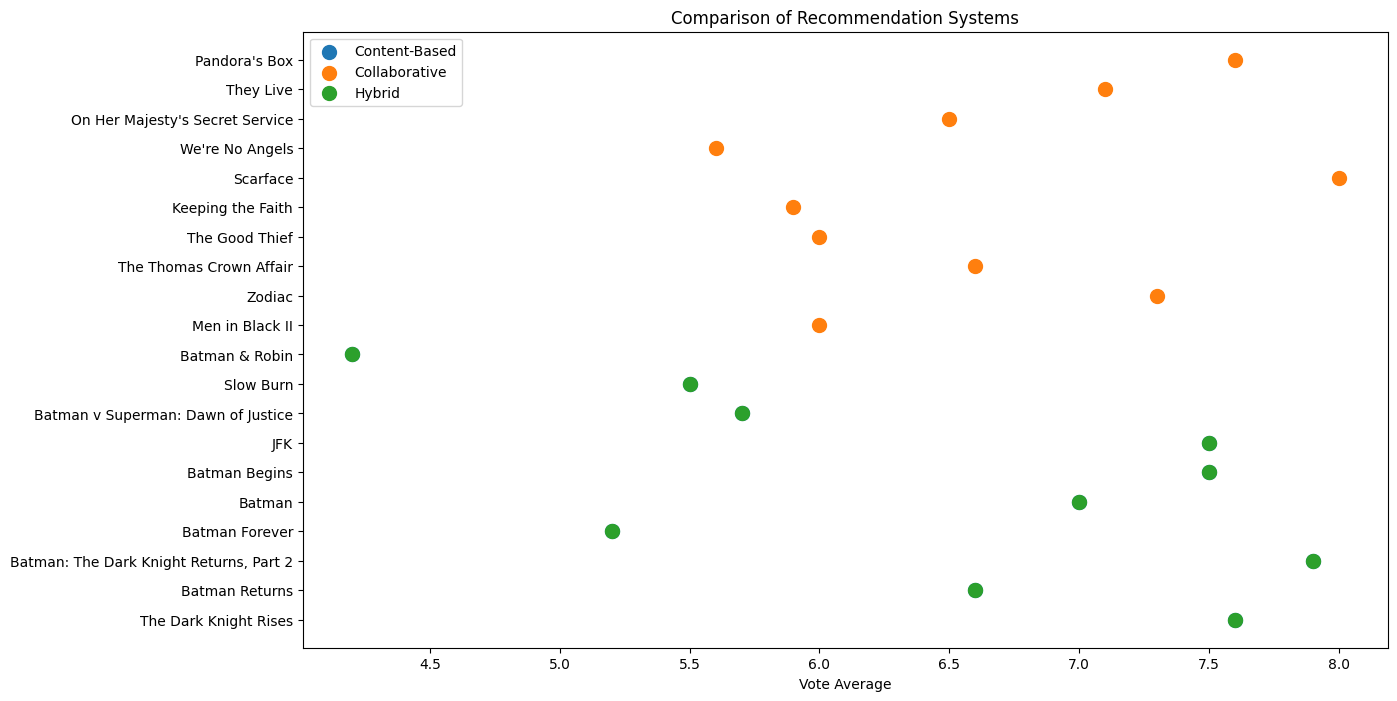

In [ ]:
plot_comparison(content_based_recs, collaborative_recs, hybrid_recs, 'Comparison of Recommendation Systems')

In [ ]:
!pip install scikit-surprise
from surprise import KNNBasic, accuracy

knn_basic = KNNBasic()
knn_basic.fit(trainset)
knn_basic_predictions = knn_basic.test(testset)
knn_basic_rmse = accuracy.rmse(knn_basic_predictions)
print(f"KNNBasic RMSE: {knn_basic_rmse}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9051
KNNBasic RMSE: 0.905137601168465


In [ ]:
!pip install scikit-surprise
from surprise import KNNWithMeans, accuracy # Import the KNNWithMeans class

# KNNWithMeans Model
knn_with_means = KNNWithMeans()
knn_with_means.fit(trainset)
knn_with_means_predictions = knn_with_means.test(testset)
knn_with_means_rmse = accuracy.rmse(knn_with_means_predictions)
print(f"KNNWithMeans RMSE: {knn_with_means_rmse}")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8804
KNNWithMeans RMSE: 0.8804151496762357


In [ ]:
comparison_data = {
    'Model': ['SVD', 'KNNBasic', 'KNNWithMeans'],
    'RMSE': [0.8332, knn_basic_rmse, knn_with_means_rmse]
}
# Replace 0 with svd_rmse if it gets calculated
comparison_table = pd.DataFrame(comparison_data)
print("Comparison Table:")
display(comparison_table)

Comparison Table:


,Model,RMSE
0,SVD,0.833200
1,KNNBasic,0.905138
2,KNNWithMeans,0.880415
